# *Advanced example* from the docs: gaussian ring

In [1]:
# Configuration
from __future__ import division
%matplotlib inline
import sys, platform, os
try:
    from cobaya.run import run
except ImportError:
    sys.path.insert(0,'../../cobaya')
    from cobaya.run import run

### Defining the *Gaussian ring* likelihood and priors for its parameters

In [2]:
import numpy as np
from scipy import stats

def gauss_ring_logp(x, y):
    return stats.norm.logpdf(np.sqrt(x**2+y**2), loc=1, scale=0.2)

info = {"likelihood": {"ring": gauss_ring_logp}}

In [3]:
from collections import OrderedDict as odict

info["params"] = odict([
    ["x", {"prior": {"min": -2, "max": 2}, "ref": 1, "proposal": 0.2}],
    ["y", {"prior": {"min": -2, "max": 2}, "ref": 0, "proposal": 0.2}]])

### Defining *dynamical* derived parameters: radius and angle

In [4]:
r = "lambda x,y: np.sqrt(x**2+y**2)"
theta = "lambda x,y: np.arctan(y/x)"

info["params"]["r"] = {"derived": r}
info["params"]["theta"] = {"derived": theta, "latex": r"\theta", "min": -np.pi/2, "max": np.pi/2}

### Sample and plot!

In [5]:
# Very non-gaussian shape: increase the default convergence criterion
info["sampler"] = {"mcmc": {"Rminus1_stop": 0.002}}

from cobaya.run import run
updated_info, products = run(info)

[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (was 2).
[mcmc] Initial covariance matrix.
[mcmc] Initial point:
[mcmc] 
weight  minuslogpost    x    y    r  theta  minuslogprior  minuslogprior__0  chi2  chi2__ring
   1.0      2.082089  1.0  0.0  1.0    0.0            NaN               NaN   NaN         NaN
[mcmc] Sampling! (NB: nothing will be printed until 40 burn-in samples have been obtained)
[mcmc] Finished burn-in phase: discarded 40 accepted steps.
[mcmc] Checkpoint: 80 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 5.789220 after 80 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 160 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Con

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.006749 after 2160 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2240 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.019709 after 2240 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2320 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.010050 after 2320 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2400 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.014119 a

Removed no burn in
[root] *WARNING* outlier fraction 0.000240384615385 


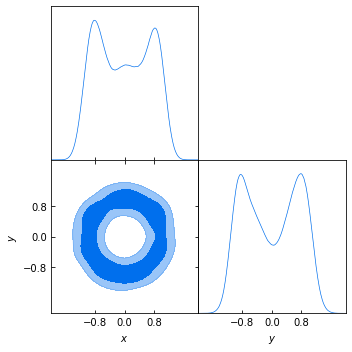

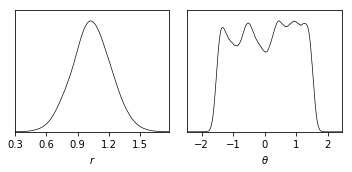

In [6]:
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

gdsamples = MCSamplesFromCobaya(updated_info, products["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["x", "y"], filled=True)
gdplot.export("example_adv_ring.png")
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.plots_1d(gdsamples, ["r", "theta"], nx=2)
gdplot.export("example_adv_r_theta.png")

### Imposing $x>y$

In [7]:
info["prior"] = {"xGTy": lambda x,y: np.log(x>y)}

from cobaya.run import run
updated_info_xGTy, products_xGTy = run(info)

[prior] *WARNING* External prior 'xGTy' loaded. Mind that it might not be normalized!
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (was 2).
[mcmc] Initial covariance matrix.
[mcmc] Initial point:
[mcmc] 
weight  minuslogpost    x    y    r  theta  minuslogprior  minuslogprior__0  minuslogprior__xGTy  chi2  chi2__ring
   1.0      2.082089  1.0  0.0  1.0    0.0            NaN               NaN                  NaN   NaN         NaN
[mcmc] Sampling! (NB: nothing will be printed until 40 burn-in samples have been obtained)
[mcmc] Finished burn-in phase: discarded 40 accepted steps.


/home/jesus/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


[mcmc] Checkpoint: 80 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.157379 after 80 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 160 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.179451 after 160 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 240 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.197886 after 240 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 320 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed

[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.025174 after 2320 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2400 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.013724 after 2400 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2480 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.006092 after 2480 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2560 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Re

[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.005983 after 4560 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 4640 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.008789 after 4640 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 4720 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.011901 after 4720 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 4800 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Re

[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.002439 after 6800 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 6880 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.003152 after 6880 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 6960 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.003222 after 6960 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 7040 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Re

[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.004687 after 9040 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 9120 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.005314 after 9120 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 9200 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.005475 after 9200 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 9280 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Re

[mcmc] Checkpoint: 11280 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.005678 after 11280 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 11360 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.004606 after 11360 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 11440 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.005186 after 11440 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 11520 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no

Removed no burn in


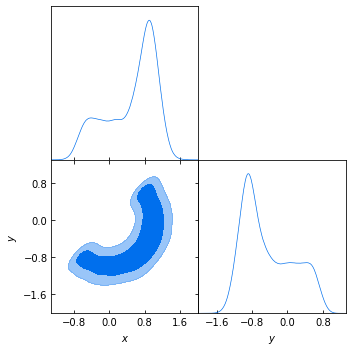

In [8]:
gdsamples_xGTy = MCSamplesFromCobaya(
    updated_info_xGTy, products_xGTy["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_xGTy, ["x", "y"], filled=True)
gdplot.export("example_adv_half.png")

## Alternative: $r$ and $\theta$ as derived parameters of the likelihood

In [9]:
# List available derived paramters in the default value of the `derived` keyword
def gauss_ring_logp_with_derived(x, y, derived=["r", "theta"]):
    r = np.sqrt(x**2+y**2)
    # Assuming `derived` is passed at runtime as a dictionary to be filled
    derived["r"] = r
    derived["theta"] = np.arctan(y/x)
    return stats.norm.logpdf(r, loc=1, scale=0.2)

# Now we don't need to *define* (but do need to *mention*) r or theta
info_alt = {"likelihood": {"ring": gauss_ring_logp_with_derived}}
info_alt["params"] = odict([
    ["x", {"prior": {"min": -2, "max": 2}, "ref": 1, "proposal": 0.2}],
    ["y", {"prior": {"min": -2, "max": 2}, "ref": 0, "proposal": 0.2}],
    ["r", None],
    ["theta", {"latex": r"\theta"}]])
info_alt["prior"] = {"xGTy": lambda x,y: np.log(x>y)}

In [10]:
info_alt["sampler"] = info["sampler"]
updated_info_alt, products_alt = run(info_alt)

[prior] *WARNING* External prior 'xGTy' loaded. Mind that it might not be normalized!
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (was 2).
[mcmc] Initial covariance matrix.
[mcmc] Initial point:
[mcmc] 
weight  minuslogpost    x    y    r  theta  minuslogprior  minuslogprior__0  minuslogprior__xGTy  chi2  chi2__ring
   1.0      2.082089  1.0  0.0  1.0    0.0            NaN               NaN                  NaN   NaN         NaN
[mcmc] Sampling! (NB: nothing will be printed until 40 burn-in samples have been obtained)
[mcmc] Finished burn-in phase: discarded 40 accepted steps.
[mcmc] Checkpoint: 80 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat


/home/jesus/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 4.210789 after 80 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 160 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.327365 after 160 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 240 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.238570 after 240 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 320 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.036198 after 32

[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2400 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.015819 after 2400 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2480 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.013223 after 2480 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2560 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.013263 after 2560 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2640 samples accepted.
[mcmc] Ready to check converg

[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 4640 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.007715 after 4640 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 4720 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.007580 after 4720 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 4800 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.004560 after 4800 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 4880 samples accepted.
[mcmc] Ready to check converg

[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 6880 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.007649 after 6880 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 6960 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.011157 after 6960 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 7040 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.011607 after 7040 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 7120 samples accepted.
[mcmc] Ready to check converg

Removed no burn in


(2, 1)

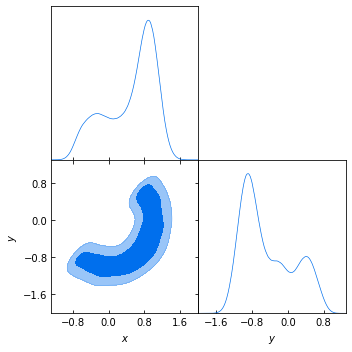

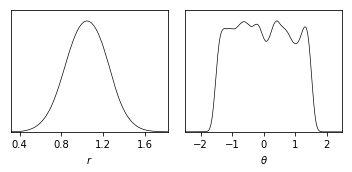

In [11]:
gdsamples_alt = MCSamplesFromCobaya(
    updated_info_alt, products_alt["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_alt, ["x", "y"], filled=True)
gdplot = gdplt.get_single_plotter(width_inch=5)
gdplot.plots_1d(gdsamples_alt, ["r", "theta"], nx=2)

## Even better: sampling on $r$ and $\theta$ instead

In [12]:
from copy import deepcopy
info_rtheta = deepcopy(info)
info_rtheta["params"] = odict([
    ["r", {"prior": {"min": 0, "max": 2}, "ref": 1,
           "proposal": 0.5, "drop": True}],
    ["theta", {"prior": {"min": -0.75*np.pi, "max": np.pi/4}, "ref": 0,
               "proposal": 0.5, "latex": r"\theta", "drop": True}],
    ["x", "lambda r,theta: r*np.cos(theta)"],
    ["y", "lambda r,theta: r*np.sin(theta)"]])
# The x>y condition is already incorporated in the prior of theta
info_rtheta["prior"].pop("xGTy")

<function __main__.<lambda>>

In [13]:
updated_info_rtheta, products_rtheta = run(info_rtheta)

[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (was 2).
[mcmc] Initial covariance matrix.
[mcmc] Initial point:
[mcmc] 
weight  minuslogpost    r  theta    x    y  minuslogprior  minuslogprior__0  chi2  chi2__ring
   1.0      1.147378  1.0    0.0  1.0  0.0            NaN               NaN   NaN         NaN
[mcmc] Sampling! (NB: nothing will be printed until 40 burn-in samples have been obtained)
[mcmc] Finished burn-in phase: discarded 40 accepted steps.
[mcmc] Checkpoint: 80 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.739165 after 80 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 160 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Con

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.012876 after 2160 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2240 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.010707 after 2240 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2320 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.001478 after 2320 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2400 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.003421 a

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.002705 after 4400 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 4480 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.003513 after 4480 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 4560 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.001412 after 4560 samples
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 4640 samples accepted.
[mcmc] Ready to check convergence learn a new proposal covmat
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[mcmc] Convergence of means: R-1 = 0.001500 a

Removed no burn in
[root] *WARNING* auto bandwidth for theta very small or failed (h=0.0006432364237713438,N_eff=2271.1745433526207). Using fallback (h=0.08310191814962474)
[root] *WARNING* 2D kernel density bandwidth optimizer failed for r, theta. Using fallback width.


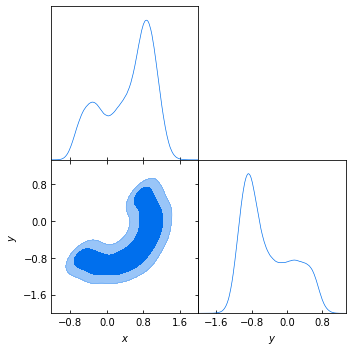

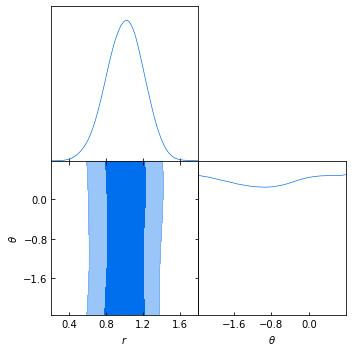

In [14]:
gdsamples_rtheta = MCSamplesFromCobaya(
    updated_info_rtheta, products_rtheta["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_rtheta, ["x", "y"], filled=True)
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_rtheta, ["r", "theta"], filled=True)